In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hospital_ds = pd.read_excel("dataset/HospitalDatabase.xlsx",
             sheet_name=['Patients','EDVisits','AmbulatoryVisits','ReAdmissionRegistry','Discharges','Providers','EDUnique'])
readm_reg=hospital_ds.get('ReAdmissionRegistry')
readm_reg

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


# 1 Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

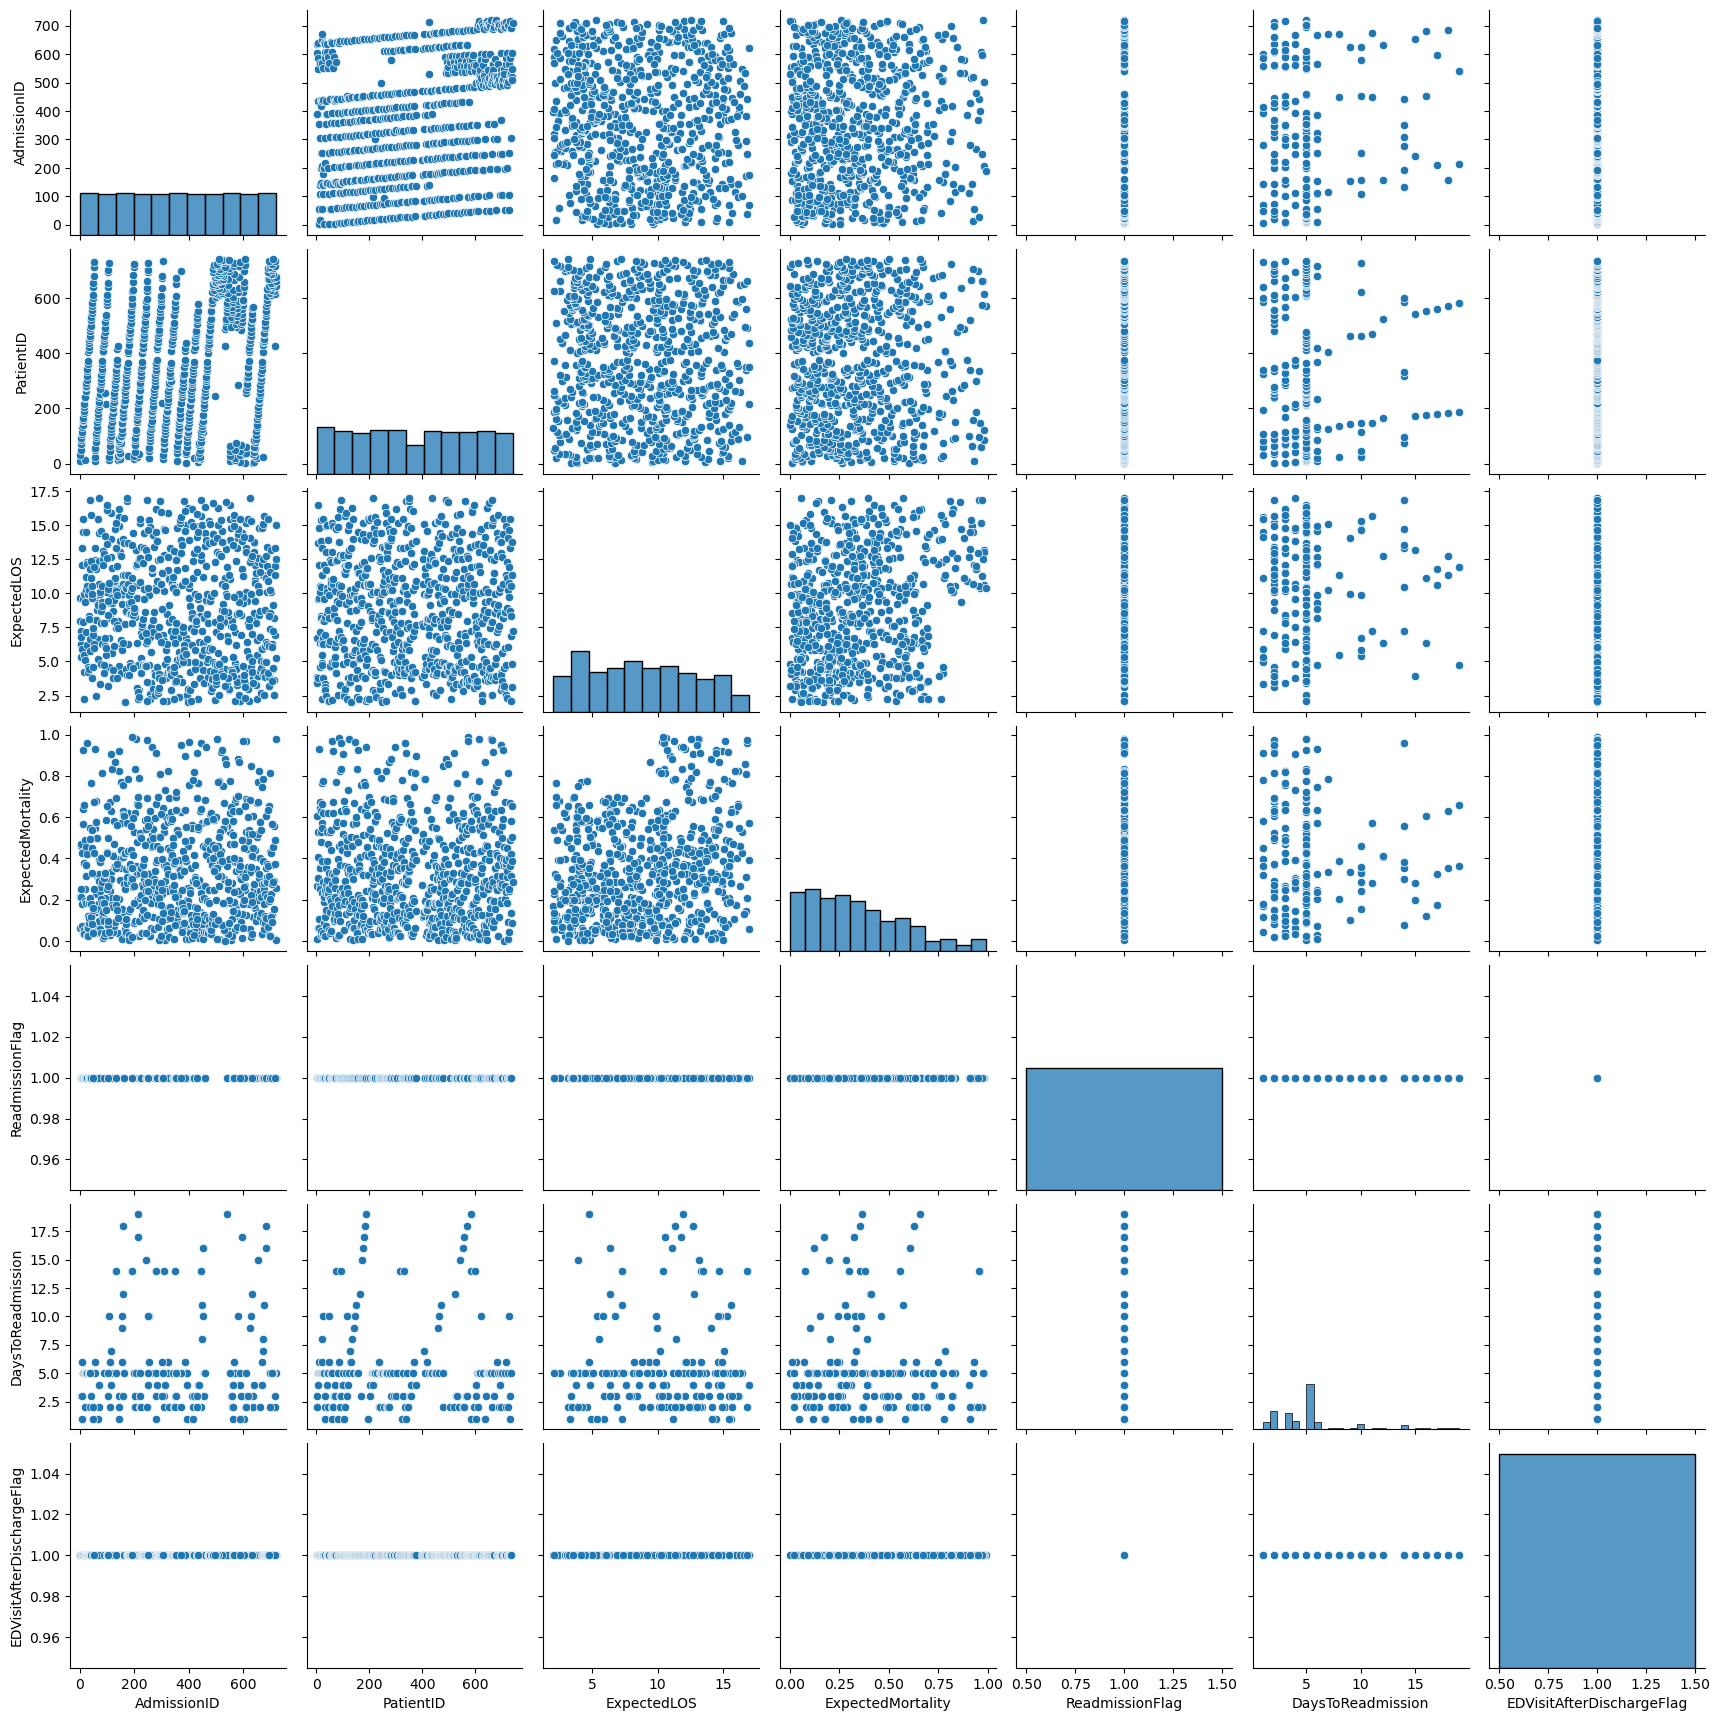

In [ ]:
sns.pairplot(readm_reg)

# 2 Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [ ]:
pat=hospital_ds["Patients"] 
pat.iloc[101:200,1:3]



,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


# 3 Create a figure object called fig using plt.figure() ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **  Plot (x,y) on that axes and set the labels. Note : You can plot on any x,y set of values. 

Text(0.5, 1.0, 'title')

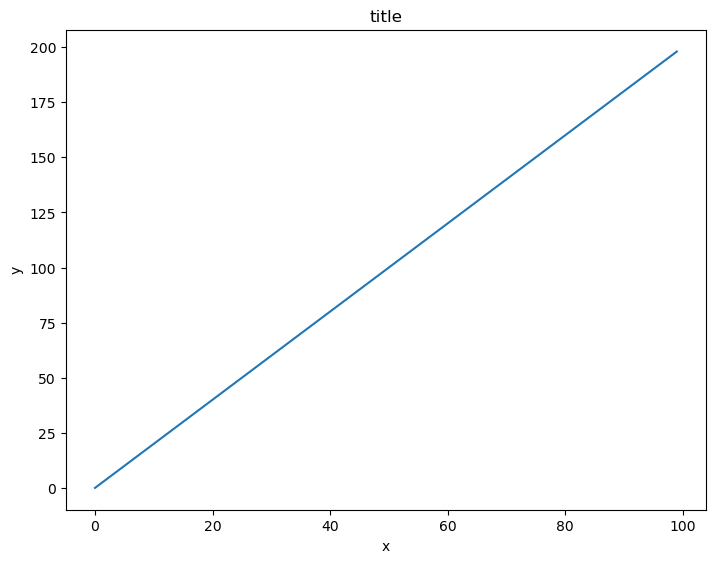

In [ ]:
x = np.arange(0,100)
y = x*2
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

# 4 Display data by splitting age in 4 quartiles and labeling the quartiles

In [ ]:
now = pd.Timestamp('now')
pat['DateOfBirth'] = pd.to_datetime(pat['DateOfBirth'], format='%m%d%y')    # 1
pat['DateOfBirth'] = pat['DateOfBirth'].where(pat['DateOfBirth'] < now, pat['DateOfBirth'] -  np.timedelta64(100, 'Y'))   # 2
pat['Age'] = round((now - pat['DateOfBirth']).astype('<m8[Y]'),0)

values=[25,50,75,100]
pat["%"]=np.percentile(values, pat['Age'])


x = np.quantile(values, [0,0.25,0.5,0.75,1])

print(x)


[ 25.    43.75  62.5   81.25 100.  ]


# 5 Display full name of patients who are born in 1986.

In [ ]:
patients=hospital_ds.get('Patients')

patient_1986 = patients[patients['DateOfBirth'].dt.strftime('%Y') == '1986']
patient_1986[patient_1986.columns[1:3]]

,FirstName,LastName
23,Gabriel,Joseph
24,Lincoln,Brenda
29,Ala,Halpert
72,Lolita,Darci
164,Fadel,Bernardt
238,Bentley,Kippax
367,Vale,Olanda
373,Britt,Dureden
386,Cristabel,Chatel
415,Constantia,Group


# 6 Create a jointplot on expected mortality & expected length of stay.

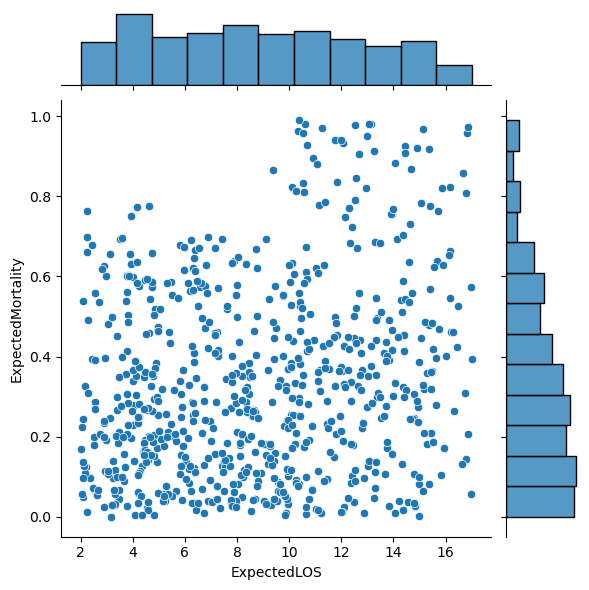

In [ ]:
sns.jointplot(x = readm_reg['ExpectedLOS'], y = readm_reg['ExpectedMortality'],kind = "scatter", data = readm_reg)
plt.show()

# 7 .Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

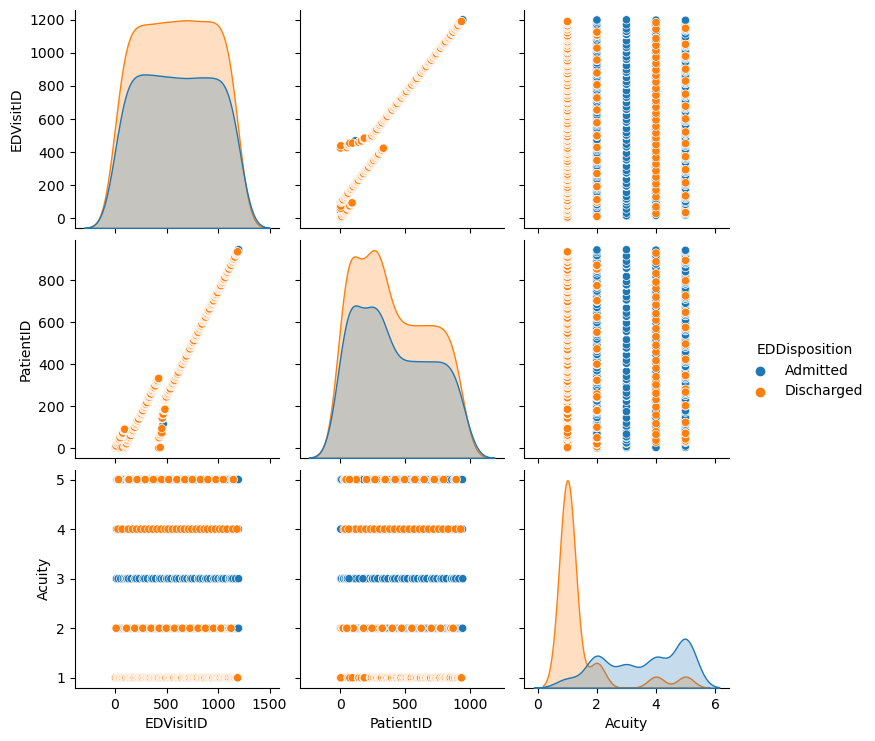

In [ ]:
EDV=hospital_ds.get('EDVisits')
sns.pairplot(EDV, hue="EDDisposition")

# 8 Create a bar chart between expectedLOS & Primary diagnosis.

<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

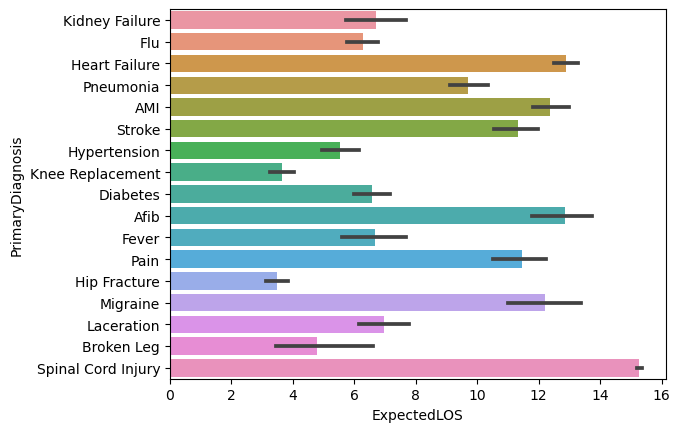

In [ ]:
sns.barplot(data=readm_reg, x="ExpectedLOS", y="PrimaryDiagnosis")

# 9 Get the list of patient ID's which are not there in ReadmissionRegistry.

In [ ]:

df1=hospital_ds.get('ReAdmissionRegistry')
df2=hospital_ds.get('Patients')
missing=df2[~df2['PatientID'].isin(df1['PatientID'])] 
missing

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,%
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0,65.50
134,135,Cally,Aylward,1962-01-13 00:11:17.581,Male,Black/African-American,English,60.0,70.00
144,145,Sheena,LLC,1966-10-17 13:24:21.621,Male,Black/African-American,English,56.0,67.00
188,189,Rempel,Group,1974-07-17 04:55:39.964,Male,Black/African-American,English,48.0,61.00
199,200,Fonz,Group,1964-01-15 01:57:57.966,Male,Black/African-American,English,58.0,68.50
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,52.00
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,64.00
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40.0,55.00
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,69.25


In [ ]:
missing["PatientID"].tolist()

[4,
 135,
 145,
 189,
 200,
 224,
 234,
 374,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 414,
 501,
 562,
 599,
 690,
 691,
 704,
 726,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,


# 10 Create a boxplot on ExpectedLOS by taking service into account.

<AxesSubplot:xlabel='ExpectedLOS', ylabel='Service'>

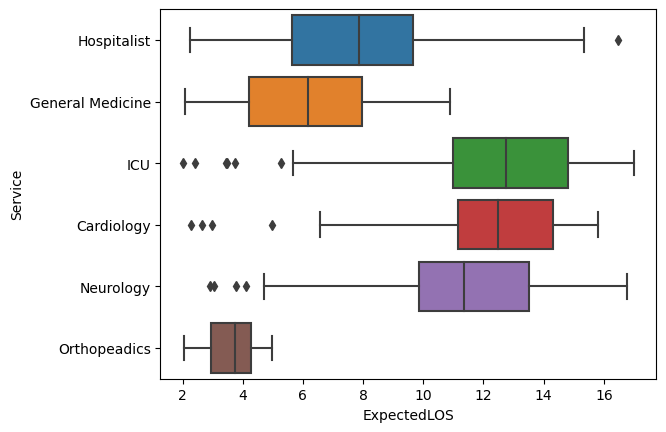

In [ ]:
sns.boxplot(data=df1, x="ExpectedLOS", y="Service")

# 11 Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.


In [ ]:
df=pd.read_excel("dataset/HospitalDatabase.xlsx",sheet_name=None)
Re_Ad_Regisrty= df['ReAdmissionRegistry']
Patients=df['Patients']
EDUnique=df['EDUnique']

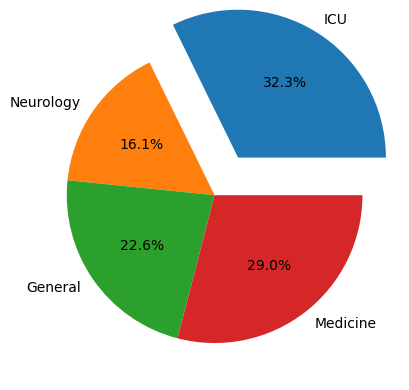

In [ ]:
ExpectedLOS=[10,5,7,9]
Service=["ICU","Neurology","General","Medicine"]
plt.pie(ExpectedLOS,labels=Service,explode=[0.3,0,0,0],autopct='%0.1f%%')
plt.show()

# 12 Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

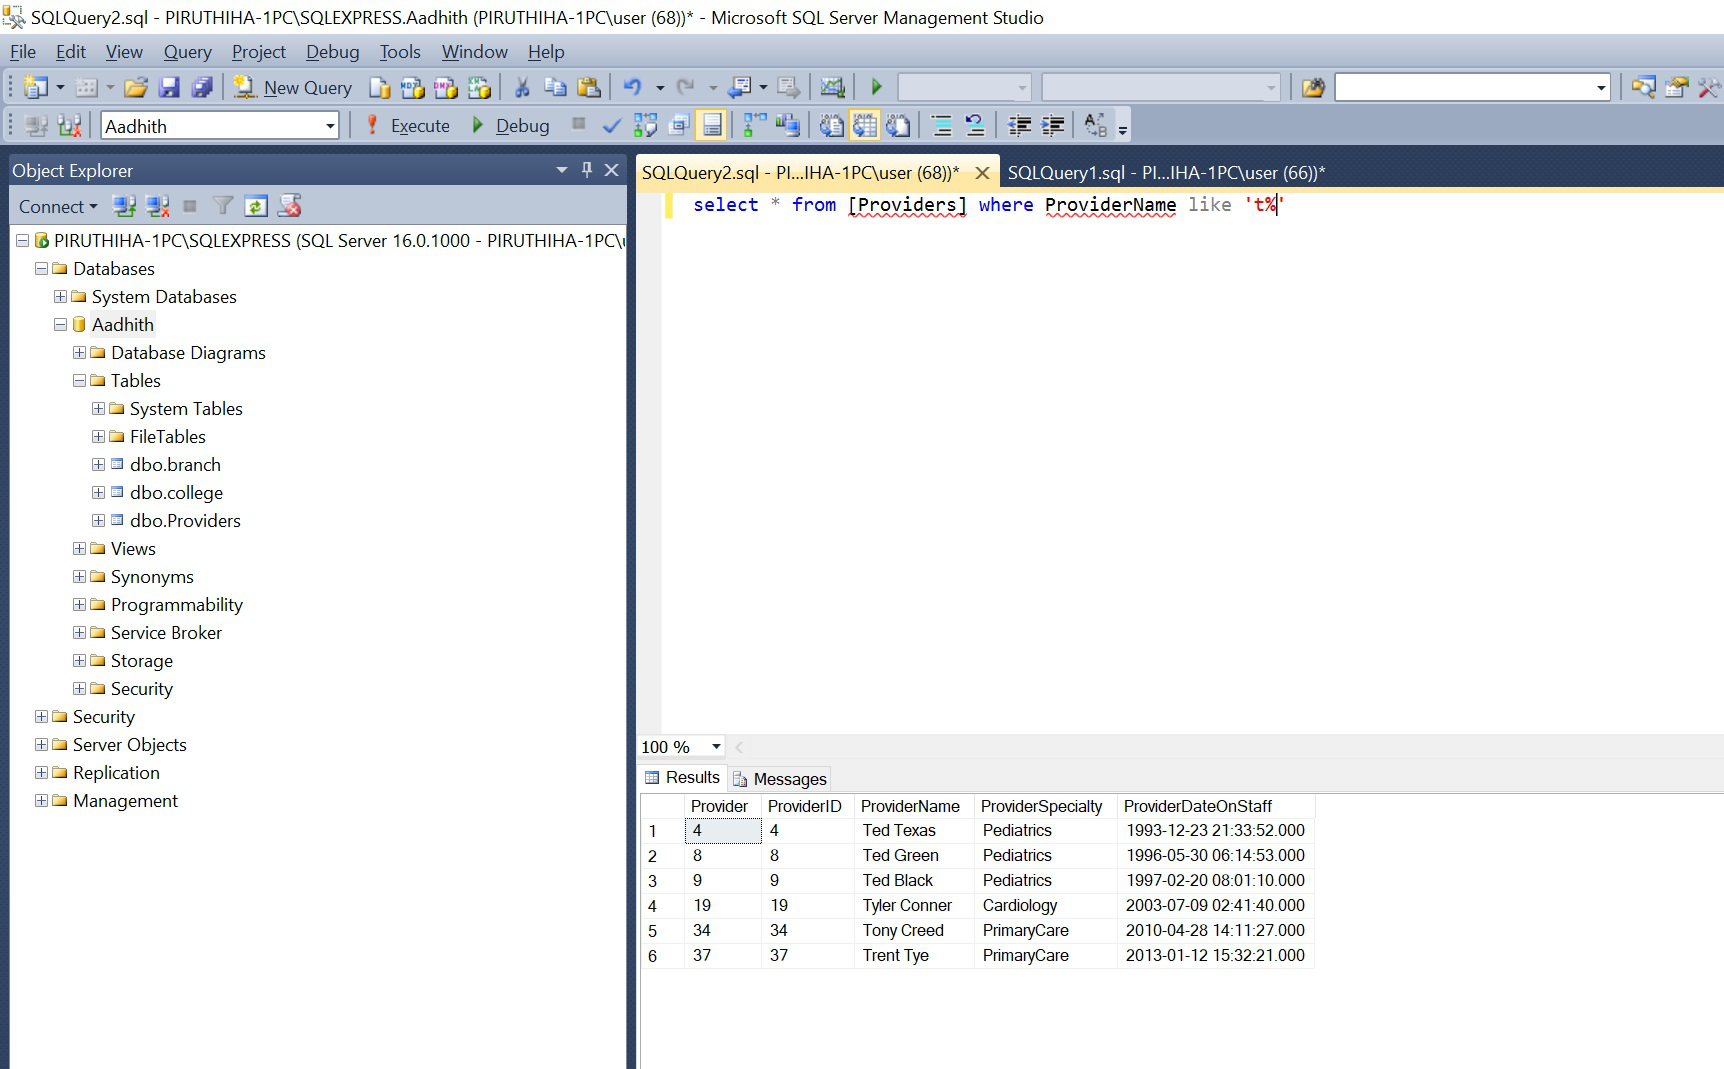

In [ ]:
from IPython.display import display
from PIL import Image

display(Image.open("QUES12.png")) 


# 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

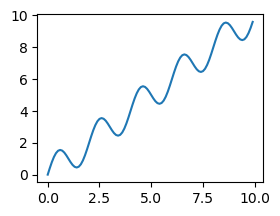

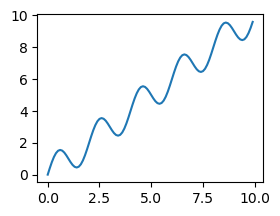

In [ ]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(2, 2, 2)  # specify (nrows, ncols, axnum)
import numpy as np
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
ax.plot(x, y)
display(fig)  

# 14 Find the number of null values in BloodPressureSystolic column.

In [ ]:
dataset=pd.read_excel("dataset/HospitalDatabase.xlsx","AmbulatoryVisits",na_values="")
df=pd.DataFrame(dataset)
df["BloodPressureSystolic"].isnull().sum()

124

# 15 Replace all the null values in ReadmissionFlag with 0.

In [ ]:
readm_reg["ReadmissionFlag"].fillna(0,inplace=True)
readm_reg["ReadmissionFlag"].to_frame("ReadmissionFlag")

,ReadmissionFlag
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
715,0.0
716,0.0
717,0.0
718,0.0


# 16 Plot a graph to show the distribution of expected length of stay.


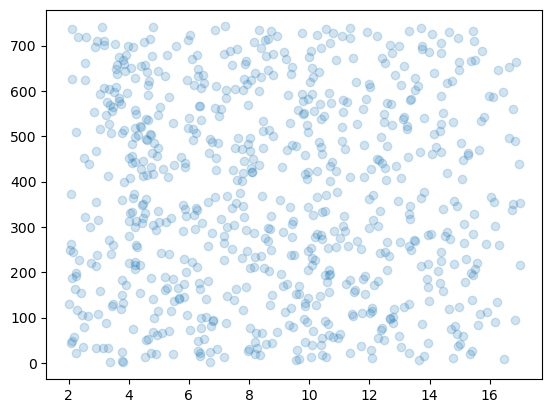

In [ ]:
x=Re_Ad_Regisrty['ExpectedLOS']
y=Re_Ad_Regisrty['PatientID']

plt.scatter(x,y,alpha=0.2)
plt.show()


# 17 Create a heat map to show the correlation between the column values of Edvisits.

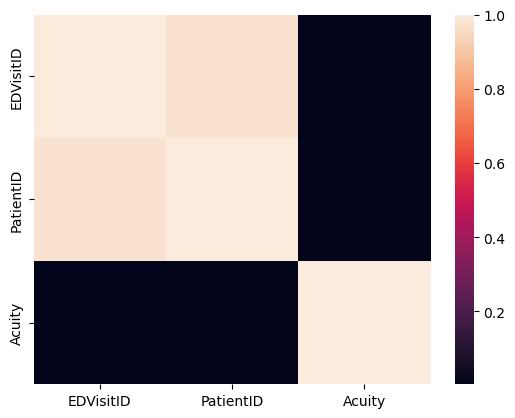

In [ ]:
vist=hospital_ds["EDVisits"]
dataplot = sns.heatmap(vist.corr())

# 18 Add column 'Age' in Patient table.

In [ ]:
dataset1= pd.read_excel("dataset/HospitalDatabase.xlsx","Patients",na_values="")
now=pd.Timestamp('now')
#New_data1['DateOfBirth']=pd.to_datetime(New_data1['DateOfBirth'],format='%m%d%y')
dataset1['DateOfBirth']=dataset1['DateOfBirth'].where(dataset1['DateOfBirth']<now,dataset1['DateOfBirth']-np.timedelta64(100,'Y'))
dataset1['age']=(now-dataset1['DateOfBirth']).astype('<m8[Y]')
dataset1


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40.0
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0


# 19 Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [ ]:
Readmin=hospital_ds["ReAdmissionRegistry"]
New=pd.DataFrame()
New['Dates'] = pd.to_datetime(Readmin['DischargeDate']).dt.date
New['Time'] = pd.to_datetime(Readmin['DischargeDate']).dt.time
New

,Dates,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


# 20 Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [ ]:
dis=hospital_ds["Discharges"]
dis.groupby(['PrimaryDiagnosis','Service']).agg(Count_number_of_patients=('PatientID','count'))

Count_number_of_patients
PrimaryDiagnosis   Service                                   
AMI                Cardiology                              40
                   Hospitalist                              1
                   ICU                                      5
                   Neurology                                2
Afib               Cardiology                              10
                   ICU                                      1
Broken Leg         Cardiology                               3
                   General Medicine                         3
                   Hospitalist                              3
Diabetes           General Medicine                        38
                   Hospitalist                             26
Fever              General Medicine                        13
                   Hospitalist                              3
                   ICU                                      3
Flu                Cardiology                               2
                   General Medicine                        54
                   Hospitalist                             19
                   ICU                                      3
                   Neurology                                2
Heart Failure      Cardiology                              39
                   ICU                                     33
                   Neurology                                6
Hip Fracture       Orthopeadics                            23
Hypertension       General Medicine                        35
                   Hospitalist                              6
                   ICU                                      4
                   Neurology                                5
Kidney Failure     Cardiology                               1
                   General Medicine                        12
                   Hospitalist                              6
                   ICU                                      1
Knee Replacement   Hospitalist                              1
                   Orthopeadics                            22
Laceration         General Medicine                        21
                   Hospitalist                              7
                   ICU                                      1
Migraine           Neurology                               12
Pain               Neurology                                7
Pneumonia          General Medicine                        67
                   Hospitalist                             28
                   ICU                                     77
                   Neurology                                5
Spinal Cord Injury ICU                                      2
Stroke             General Medicine                        20
                   Hospitalist                              1
                   ICU                                     21
                   Neurology                               26

# 21 Which demographic patients are prone to get stroke?

In [ ]:
df=pd.read_excel("dataset/HospitalDatabase.xlsx",sheet_name=None)
Demographic_Patients=df['Patients']
Demographic_Patients1=Demographic_Patients.rename(columns={'PatientMRN'  : 'PatientID'})
Demographic_Patients1

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [ ]:
Re_Ad_Regisrty3=df['ReAdmissionRegistry']
Demographic_Patients2=pd.merge(Demographic_Patients1,Re_Ad_Regisrty3,how='outer',indicator=True)
Race=Demographic_Patients2[Demographic_Patients2['PrimaryDiagnosis']=='Stroke']
Race

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,_merge
9,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,355.0,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,1.0,5.0,1.0,both
13,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish,18.0,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,1.0,5.0,1.0,both
19,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,252.0,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,NaN,NaN,NaN,both
35,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,2.0,2018-01-02,2018-01-16 07:25:09.548,Home,General Medicine,Stroke,7.985315,0.212920,NaN,NaN,NaN,both
41,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,147.0,2018-01-02,2018-01-18 00:24:01.294,Home,Neurology,Stroke,13.042939,0.351937,NaN,NaN,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,601,Aurelie,Lerner,1983-07-24 02:55:54.675,Male,Black/African-American,English,192.0,2018-02-16,2018-02-28 14:01:18.908,Home,Neurology,Stroke,13.499803,0.299733,1.0,14.0,1.0,both
616,602,Marjie,Walsh,1982-06-12 17:17:14.100,Male,Black/African-American,English,47.0,2018-02-16,2018-03-04 04:43:09.738,Home,General Medicine,Stroke,7.245086,0.044968,1.0,1.0,1.0,both
625,611,Adolf,Ormes,1975-12-04 05:13:13.613,Male,Black/African-American,English,48.0,2018-02-17,2018-02-24 23:03:41.580,Home,General Medicine,Stroke,6.904901,0.147814,1.0,2.0,1.0,both
656,642,Jerde,Endrizzi,1961-04-30 14:54:37.810,Female,Black/African-American,English,102.0,2018-02-18,2018-02-28 08:32:49.644,Home,Neurology,Stroke,10.334429,0.077559,1.0,3.0,1.0,both


In [ ]:
Race.groupby('Race')['PatientID'].count()


Race
Black/African-American    40
White                     28
Name: PatientID, dtype: int64

# 22 Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [ ]:
EDD=df['EDUnique']
EDDAD=EDD['EDDisposition'].replace('admitted','Admitted',inplace=True)
EDDDIS=EDD['EDDisposition'].replace('discharged','Discharged',inplace=True)
EDD

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


In [ ]:
EDD1=EDD.pivot_table(index='Acuity',columns='EDDisposition',values='PatientID',aggfunc='count')
EDD1

EDDisposition,Admitted,Discharged
Acuity,,
1,29.0,398.0
2,102.0,41.0
3,70.0,NaN
4,97.0,22.0
5,162.0,24.0


# 23 Write a function to find the center element in the list. (one element in odd length list, two elements in even length list).

In [ ]:
def CenterElement(input_list):
    middle = float(len(input_list))/2
    if len(input_list) % 2 != 0:
        
        return input_list[int(middle - .5)]
    else:
        
        return (input_list[int(middle-1)], input_list[int(middle)])
    
print(CenterElement([1,2,3,4,5]))
print(CenterElement([1,2,3,4,5,6]))

3
(3, 4)


# 24 Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [ ]:
EDD2=EDD.groupby(['EDDisposition','ReasonForVisit']).agg({'PatientID':'count'})
EDD3=EDD2.rename(columns={'PatientID':'Count of PatientID'})
EDD3

Count of PatientID
EDDisposition ReasonForVisit                         
Admitted      Accident                             37
              Bleeding                             14
              Car Accident                         16
              Chest Pain                           80
              Fever                                40
              Gun Shot                             16
              Migraine                             41
              Pneumonia                           122
              Shortness of Breath                  65
              Stomach Ache                         29
Discharged    Bleeding                             11
              Chest Pain                           11
              Fever                               132
              Intoxication                         23
              Laceration                           22
              Migraine                             75
              Pneumonia                            49
              Shortness of Breath                  55
              Stomach Ache                        107

In [ ]:
EDD3.stack()

EDDisposition  ReasonForVisit                         
Admitted       Accident             Count of PatientID     37
               Bleeding             Count of PatientID     14
               Car Accident         Count of PatientID     16
               Chest Pain           Count of PatientID     80
               Fever                Count of PatientID     40
               Gun Shot             Count of PatientID     16
               Migraine             Count of PatientID     41
               Pneumonia            Count of PatientID    122
               Shortness of Breath  Count of PatientID     65
               Stomach Ache         Count of PatientID     29
Discharged     Bleeding             Count of PatientID     11
               Chest Pain           Count of PatientID     11
               Fever                Count of PatientID    132
               Intoxication         Count of PatientID     23
               Laceration           Count of PatientID     22
               

In [ ]:
EDD3.unstack()

Count of PatientID                                          \
ReasonForVisit           Accident Bleeding Car Accident Chest Pain  Fever   
EDDisposition                                                               
Admitted                     37.0     14.0         16.0       80.0   40.0   
Discharged                    NaN     11.0          NaN       11.0  132.0   

                                                                    \
ReasonForVisit Gun Shot Intoxication Laceration Migraine Pneumonia   
EDDisposition                                                        
Admitted           16.0          NaN        NaN     41.0     122.0   
Discharged          NaN         23.0       22.0     75.0      49.0   

                                                 
ReasonForVisit Shortness of Breath Stomach Ache  
EDDisposition                                    
Admitted                      65.0         29.0  
Discharged                    55.0        107.0

# 25 Plot a graph by counting the no. of patients in each department.


In [ ]:
AV=df['AmbulatoryVisits']
Department_wise_Patient_Count=AV.groupby('VisitDepartmentID')['PatientMRN'].count()
Department_wise_Patient_Count1=Department_wise_Patient_Count.reset_index()
#Department_wise_Patient_Count2=Department_wise_Patient_Count1.rename(columns={'PatientMRN':'Number of Patients'})
Department_wise_Patient_Count1

,VisitDepartmentID,PatientMRN
0,1,51
1,2,51
2,3,51
3,4,51
4,5,92
5,6,92
6,7,93
7,8,93
8,9,79
9,10,100


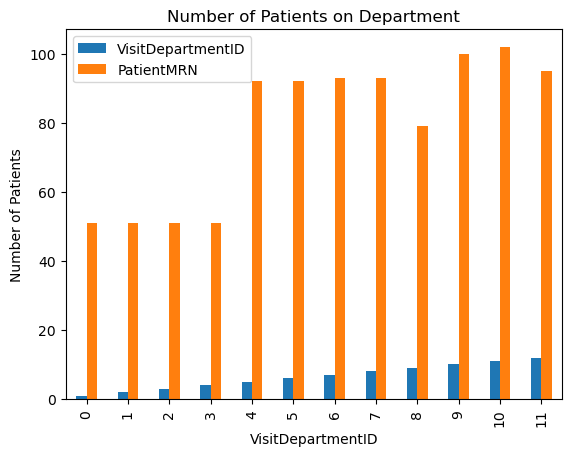

In [ ]:
Department_wise_Patient_Count1.plot(kind='bar',title='Number of Patients on Department',ylabel='Number of Patients',xlabel='VisitDepartmentID')
plt.show()

# 26 Using arrays and loops, find the count of patients based on gender.

In [ ]:
patients=hospital_ds.get('Patients')
female = 0
male = 0
for row in patients["Gender"]:
    if row=="Male":
        male  = male+1             
    else:
        female= female+1
     
 
print ("Total Female patients :"+ str(female))
print ("Total male patients :"+ str(male))


Total Female patients :408
Total male patients :537


# 27 Plot a graph to count the patients based on discharge disposition.


In [ ]:
Count_of_Patients_based_on_DD=df['ReAdmissionRegistry']
Count_of_Patients_based_on_DD1=Count_of_Patients_based_on_DD.groupby('DischargeDisposition')['PatientID'].count()

<AxesSubplot:xlabel='DischargeDisposition', ylabel='PatientID'>

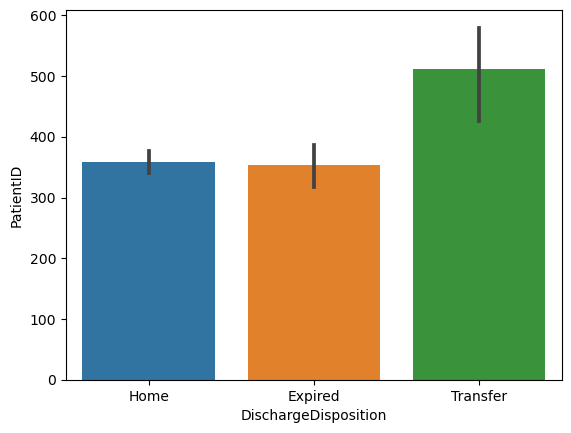

In [ ]:
sns.barplot(data=Count_of_Patients_based_on_DD,x='DischargeDisposition',y='PatientID')

# 28 Which reason of visit has maximum mortality rate.


In [ ]:
Reason_For_visit=pd.merge(EDUnique,Re_Ad_Regisrty,on='PatientID')
Reason_For_visit

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,389,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,568,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,107,2018-01-01,2018-01-09 21:34:42.467,Home,Hospitalist,Flu,4.554479,0.266584,1.0,5.0,1.0
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,18,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,1.0,5.0,1.0
4,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,140,2018-01-01,2018-01-10 06:59:30.556,Home,Hospitalist,Kidney Failure,10.547415,0.353074,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,987,733,2020-01-13 04:01:54.743,2020-01-14 01:05:42.893,1,Fever,discharged,716,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,1.0,3.0,1.0
716,992,738,2020-01-13 05:15:15.325,2020-01-13 16:12:05.842,1,Stomach Ache,discharged,521,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
717,993,739,2020-01-13 05:25:39.117,2020-01-14 03:48:50.905,1,Migraine,discharged,548,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
718,994,740,2020-01-13 05:43:54.733,2020-01-13 17:56:57.745,1,Stomach Ache,discharged,509,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN


In [ ]:
Reason_For_visit1=Reason_For_visit.loc[:,['ReasonForVisit','ExpectedMortality']]
Reason_For_visit2=Reason_For_visit1.groupby('ReasonForVisit')['ExpectedMortality'].max()

Reason_For_visit2

ReasonForVisit
Accident               0.811386
Bleeding               0.846462
Car Accident           0.939242
Chest Pain             0.927417
Fever                  0.958035
Gun Shot               0.672536
Intoxication           0.967396
Laceration             0.908532
Migraine               0.976742
Pneumonia              0.989945
Shortness of Breath    0.980479
Stomach Ache           0.979952
Name: ExpectedMortality, dtype: float64

# 29 Calculate average LOS.

In [ ]:
LOS=Re_Ad_Regisrty.loc[:,['AdmissionDate','DischargeDate','ExpectedLOS']]
LOS

,AdmissionDate,DischargeDate,ExpectedLOS
0,2018-01-01,2018-01-04 19:59:31.391,6.717771
1,2018-01-01,2018-01-04 21:28:51.898,3.825969
2,2018-01-01,2018-01-04 22:28:23.672,3.382493
3,2018-01-01,2018-01-05 05:47:04.933,3.763352
4,2018-01-01,2018-01-05 14:18:30.029,13.650953
...,...,...,...
715,2018-02-22,2018-03-07 21:22:10.061,13.725405
716,2018-02-22,2018-03-08 02:43:18.749,11.355456
717,2018-02-22,2018-03-08 09:27:18.377,4.819882
718,2018-02-22,2018-03-10 06:06:12.068,3.123064


In [ ]:
LOS['DD']=LOS.DischargeDate.dt.date
LOS['ActualLOS']=round((LOS['DischargeDate']-LOS['AdmissionDate'])/np.timedelta64(1,'D'),0)
LOS['ActualLOS'].mean()

10.02361111111111

# 30 Which patient id has most entries in readmission registry.

In [ ]:
Re_Ad_Regisrty['PatientID'].value_counts().idxmax()

23

# 31 Find the count of White Spanish Male.

In [ ]:
White=Patients.loc[(Patients['Gender']=='Male')&(Patients['Race']=='White')&(Patients['Language']=='Spanish')]
White

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
10,11,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish
12,13,Skippie,Marriot,1978-05-12 20:12:54.106,Male,White,Spanish
13,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish
14,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish
15,16,Far,Pardon,1974-08-08 10:55:59.043,Male,White,Spanish
16,17,Gerhold,Kendall,1974-02-15 22:02:36.479,Male,White,Spanish
17,18,Sheena,Kevin,1983-01-20 20:40:26.024,Male,White,Spanish
18,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish
19,20,Megan,Walter,1960-02-10 19:04:57.032,Male,White,Spanish


In [ ]:
White['PatientID'].count()

15

# 32 If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [ ]:
Patients_ds=hospital_ds["Patients"]

female = 0
male = 0
 

for ind in Patients_ds.index:      
    if (Patients_ds['Gender'][ind])=="Male":
      Patients_ds["FirstName"].at[ind]  = "Mr. "+Patients_ds["FirstName"][ind] 
    else:
        Patients_ds["FirstName"].at[ind] = "Ms. "+Patients_ds["FirstName"][ind]   

Patients_ds.head(50)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Mr. Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Mr. Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Mr. Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Mr. Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Mr. Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
5,6,Mr. Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English
6,7,Mr. Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English
7,8,Mr. Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English
8,9,Mr. Devlin,Black,1974-09-24 23:43:46.185,Male,White,English
9,10,Mr. Granny,Man,1969-09-15 11:20:42.218,Male,White,English


# 33 Using a bar chart, which Service had the lowest count of Expected Mortality?

In [ ]:
Exp_Mort=df['ReAdmissionRegistry']
Exp_Mort

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [ ]:
Exp_Mort1=Exp_Mort.loc[:,['Service','ExpectedMortality']]
Exp_Mort1

,Service,ExpectedMortality
0,Hospitalist,0.010046
1,General Medicine,0.604562
2,General Medicine,0.266137
3,General Medicine,0.307527
4,ICU,0.408898
...,...,...
715,Cardiology,0.388319
716,ICU,0.088518
717,Hospitalist,0.503308
718,General Medicine,0.655870


In [ ]:
Exp_Mort2=pd.pivot_table(Exp_Mort1,index=['Service'],values='ExpectedMortality',aggfunc='count')
Exp_Mort2.reset_index()

,Service,ExpectedMortality
0,Cardiology,95
1,General Medicine,263
2,Hospitalist,101
3,ICU,151
4,Neurology,65
5,Orthopeadics,45


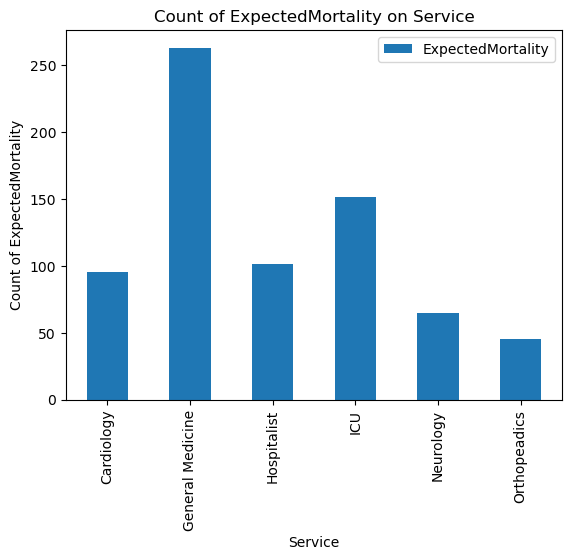

In [ ]:
Exp_Mort2.plot(kind='bar',title='Count of ExpectedMortality on Service',ylabel='Count of ExpectedMortality',xlabel='Service')
plt.show()

# 34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [ ]:
Array=np.arange(1,31).reshape(6,5)

In [ ]:
Array[(2,2,3,3),(0,1,0,1)]

array([11, 12, 16, 17])

# 35 np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [ ]:
A=np.arange(1,31).reshape(6,5)

In [ ]:
#Method 1
A[(0,1,2,3),(1,2,3,4)]

array([ 2,  8, 14, 20])

In [ ]:
#method 2
i=1
for x in A:
    if(i<len(x)):
        print(x[i],end=" ")
        i=i+1

2 8 14 20 

# 36 Create a correlation matrix on EDVisits.

In [ ]:
corr_matrix = hospital_ds["EDVisits"].corr()
print(corr_matrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


# 37 Write a function to print all the upper case letter of a given sentence.

In [ ]:
test_str = "NumPY NinjaS" 
res = [char for char in test_str if char.isupper()]

print("The uppercase characters in string are :"  + str(res))

The uppercase characters in string are :['N', 'P', 'Y', 'N', 'S']


#  38 Number of patients on 'Transfer' based on primary diagnosis.

In [ ]:
Transfer=Re_Ad_Regisrty.loc[Re_Ad_Regisrty['DischargeDisposition']=='Transfer']
Transfer1=Transfer.loc[:,['PatientID','DischargeDisposition','PrimaryDiagnosis']]
Transfer2=Transfer1.groupby('PrimaryDiagnosis')['PatientID'].count()
Transfer3=Transfer2.reset_index()
Transfer3.rename(columns={'PatientID':'Number Of Patients Based on Transfer'})

,PrimaryDiagnosis,Number Of Patients Based on Transfer
0,Afib,1
1,Diabetes,7
2,Flu,2
3,Heart Failure,9
4,Knee Replacement,1
5,Laceration,1
6,Pain,1
7,Pneumonia,8
8,Stroke,9


# 39 Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [ ]:
Migrane=pd.merge(EDUnique,Patients,on='PatientID')
Migrane

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,Skippie,Marriot,1978-05-12 20:12:54.106,Male,White,Spanish
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,discharged,Ediva,MacTeague,1963-04-05 17:42:15.238,Male,Black/African-American,English
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,discharged,Kellsie,MacTeague,1966-06-28 14:49:50.758,Male,Black/African-American,English
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,discharged,Freeland,Chansonnau,1978-10-02 10:03:36.336,Male,Black/African-American,English
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,discharged,Margalit,Borland,1973-12-02 11:38:24.057,Male,Black/African-American,English


In [ ]:
Migrane1=Migrane.loc[Migrane['ReasonForVisit']=='Migraine']
Migrane1

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,FirstName,LastName,DateOfBirth,Gender,Race,Language
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish
22,55,3,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,admitted,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
44,113,22,2020-01-02 06:04:16.123,2020-01-02 08:50:41.108,2,Migraine,Admitted,Joesph,Long,1979-12-04 16:45:56.080,Male,White,Spanish
46,115,24,2020-01-02 06:41:15.499,2020-01-02 17:42:56.948,3,Migraine,Admitted,Gabriel,Joseph,1986-05-31 09:36:05.716,Male,White,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1124,870,2020-01-14 15:31:20.038,2020-01-15 10:28:29.406,2,Migraine,Discharged,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English
921,1151,897,2020-01-15 00:24:27.036,2020-01-15 02:11:30.139,1,Migraine,discharged,Barrows,Coupland,1979-10-31 18:28:35.483,Male,White,English
928,1162,908,2020-01-15 03:20:10.313,2020-01-15 05:12:01.600,1,Migraine,discharged,Knox,Group,1975-08-25 22:27:50.177,Male,Black/African-American,English
930,1164,910,2020-01-15 04:02:21.645,2020-01-15 19:45:03.534,1,Migraine,discharged,Kuvalis,Coupland,1986-05-23 19:23:27.752,Male,Black/African-American,English


In [ ]:
Migrane1.loc[:,['FirstName','LastName','DateOfBirth','ReasonForVisit']]

,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
3,Gan,Yu,1970-06-02 06:22:54.675,Migraine
22,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
44,Joesph,Long,1979-12-04 16:45:56.080,Migraine
46,Gabriel,Joseph,1986-05-31 09:36:05.716,Migraine
...,...,...,...,...
908,Hauck,Rubbens,1963-11-16 03:31:38.929,Migraine
921,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
928,Knox,Group,1975-08-25 22:27:50.177,Migraine
930,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine


# 40 Plot a graph showing the count of patients for the reason visited the hospital.

In [ ]:
Count_of_Patients_based_on_Reasonvisited=df['EDVisits']
Count_of_Patients_based_on_Reasonvisited=Count_of_Patients_based_on_Reasonvisited.groupby('ReasonForVisit')['PatientID'].count()
Count_of_Patients_based_on_Reasonvisited.reset_index()

,ReasonForVisit,PatientID
0,Accident,39
1,Bleeding,31
2,Car Accident,17
3,Chest Pain,109
4,Cough,1
5,Fever,234
6,Gun Shot,16
7,Intoxication,30
8,Laceration,30
9,Migraine,156


<AxesSubplot:title={'center':'Count_of_Patients_based_on_Reasonvisited'}, xlabel='Reason For Visit', ylabel='Count of PAtients'>

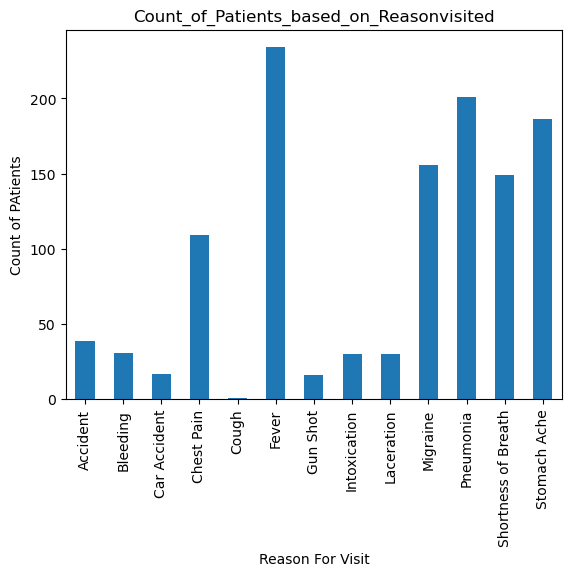

In [ ]:
Count_of_Patients_based_on_Reasonvisited.plot(kind='bar',xlabel='Reason For Visit',ylabel='Count of PAtients',title='Count_of_Patients_based_on_Reasonvisited')

# 41  Find the visit type with maximum 'No Show'.

In [ ]:
npshw=hospital_ds.get('AmbulatoryVisits')
occur = npshw.query("VisitStatus=='No Show'").groupby(['VisitType','VisitStatus']).size().to_frame('count')
display(occur)

,,count
VisitType,VisitStatus,
Follow Up,No Show,41
Physical,No Show,39
Telemedicine,No Show,74


# 42 Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [ ]:
Providers1=df['Providers']
df_prov=Providers1.loc[:,['ProviderName','ProviderID']]
df_prov=df_prov[(Providers1['ProviderSpecialty']=='Surgery')& (Providers1['ProviderID']>11)& (Providers1['ProviderID']<20)]
print(df_prov)

       ProviderName  ProviderID
11         Sarah Ab          12
12  Abigail Marriot          13
13          Dave Yu          14
14  Christian Saint          15
15     Perry Pardon          16


# 43 in 34, when the value is less than 6, print as -1,else print 99.

In [ ]:
Num=np.arange(1,31).reshape(6,5)
Num

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [ ]:
Num[Num>6]=99
Num[Num<=6]=-1
print(Num)

[[-1 -1 -1 -1 -1]
 [-1 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


# 44: Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [ ]:
readm_reg['AdmissionDate']=pd.to_datetime(readm_reg['AdmissionDate'])
readm_reg['DischargeDate']=pd.to_datetime(readm_reg['DischargeDate'])
readm_reg['diff']=readm_reg['DischargeDate'].dt.date - readm_reg['AdmissionDate'].dt.date
readm_reg.head()

data_pivot=readm_reg[['diff','Service','PrimaryDiagnosis']]
table=pd.pivot_table(data=data_pivot,index='Service',columns='PrimaryDiagnosis')
table

diff                                    \
PrimaryDiagnosis              AMI             Afib       Broken Leg   
Service                                                               
Cardiology       10 days 06:00:00 11 days 04:48:00 10 days 16:00:00   
General Medicine              NaT              NaT 13 days 00:00:00   
Hospitalist      10 days 00:00:00              NaT  7 days 16:00:00   
ICU              12 days 04:48:00  6 days 00:00:00              NaT   
Neurology         9 days 00:00:00              NaT              NaT   
Orthopeadics                  NaT              NaT              NaT   

                                                              \
PrimaryDiagnosis                   Diabetes            Fever   
Service                                                        
Cardiology                              NaT              NaT   
General Medicine 10 days 06:56:50.526315789  8 days 00:00:00   
Hospitalist       8 days 20:18:27.692307692 10 days 16:00:00   
ICU                                     NaT 13 days 08:00:00   
Neurology                               NaT              NaT   
Orthopeadics                            NaT              NaT   

                                                                      \
PrimaryDiagnosis                       Flu             Heart Failure   
Service                                                                
Cardiology                12 days 00:00:00 9 days 12:18:27.692307692   
General Medicine           9 days 21:20:00                       NaT   
Hospitalist      8 days 17:41:03.157894736                       NaT   
ICU                        8 days 00:00:00 9 days 10:54:32.727272727   
Neurology                  7 days 00:00:00          13 days 04:00:00   
Orthopeadics                           NaT                       NaT   

                                                                      \
PrimaryDiagnosis              Hip Fracture              Hypertension   
Service                                                                
Cardiology                             NaT                       NaT   
General Medicine                       NaT 8 days 21:56:34.285714285   
Hospitalist                            NaT          10 days 16:00:00   
ICU                                    NaT           8 days 12:00:00   
Neurology                              NaT           9 days 00:00:00   
Orthopeadics     9 days 04:10:26.086956521                       NaT   

                                                                              \
PrimaryDiagnosis   Kidney Failure Knee Replacement                Laceration   
Service                                                                        
Cardiology        4 days 00:00:00              NaT                       NaT   
General Medicine 10 days 16:00:00              NaT 9 days 10:17:08.571428571   
Hospitalist      10 days 04:00:00  6 days 00:00:00           9 days 00:00:00   
ICU              11 days 00:00:00              NaT          15 days 00:00:00   
Neurology                     NaT              NaT                       NaT   
Orthopeadics                  NaT  9 days 12:00:00                       NaT   

                                                             \
PrimaryDiagnosis        Migraine                       Pain   
Service                                                       
Cardiology                   NaT                        NaT   
General Medicine             NaT                        NaT   
Hospitalist                  NaT                        NaT   
ICU                          NaT                        NaT   
Neurology        8 days 14:00:00 10 days 06:51:25.714285714   
Orthopeadics                 NaT                        NaT   

                                                               \
PrimaryDiagnosis                 Pneumonia Spinal Cord Injury   
Service                                                         
Cardiology                    

# 45 Calculate mortality by diagnosis.


In [ ]:
Mortality_Rate=Re_Ad_Regisrty.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum()
Mortality_Rate.reset_index()


,PrimaryDiagnosis,ExpectedMortality
0,AMI,11.287028
1,Afib,3.346590
2,Broken Leg,2.478958
3,Diabetes,18.334439
4,Fever,5.635418
5,Flu,21.838083
6,Heart Failure,30.082879
7,Hip Fracture,8.586140
8,Hypertension,14.827774
9,Kidney Failure,4.951837


# 46 Write a code to split a sentence into words using regex.


In [ ]:
import re
MyName='Welcome-to-Numpy-Ninja'

re.split(pattern=r"[---]",string= MyName)



C:\Users\Gobinath\AppData\Local\Temp\ipykernel_10472\238945658.py:4: FutureWarning: Possible set difference at position 2
  re.split(pattern=r"[---]",string= MyName)


['Welcome', 'to', 'Numpy', 'Ninja']

# 47  Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


In [ ]:
BPS=df['AmbulatoryVisits']
BPS

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [ ]:
#MEthod 1
BPS.loc[BPS['BloodPressureSystolic'].idxmax()]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

In [ ]:
#method 2
BPS[BPS['BloodPressureSystolic']==BPS['BloodPressureSystolic'].max()]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


# 48 Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [ ]:
#method 1
Avg_LOS=Re_Ad_Regisrty.groupby(['Service','DischargeDisposition'])['ExpectedLOS'].mean()
Avg_LOS1=Avg_LOS.reset_index()
Avg_LOS2=Avg_LOS1.rename(columns={'ExpectedLOS':'Average LOS'})
Avg_LOS2

,Service,DischargeDisposition,Average LOS
0,Cardiology,Expired,9.202626
1,Cardiology,Home,12.864936
2,Cardiology,Transfer,11.818403
3,General Medicine,Expired,5.874003
4,General Medicine,Home,6.105696
5,General Medicine,Transfer,6.116124
6,Hospitalist,Expired,6.775636
7,Hospitalist,Home,8.009046
8,Hospitalist,Transfer,5.701389
9,ICU,Expired,9.919063


In [ ]:
#Method 2
pd.pivot_table(Re_Ad_Regisrty,index='Service',columns='DischargeDisposition',values='ExpectedLOS',aggfunc='mean')


DischargeDisposition,Expired,Home,Transfer
Service,,,
Cardiology,9.202626,12.864936,11.818403
General Medicine,5.874003,6.105696,6.116124
Hospitalist,6.775636,8.009046,5.701389
ICU,9.919063,13.451158,11.989238
Neurology,9.384312,12.538859,11.469198
Orthopeadics,3.943883,3.508337,4.842255


# 49 Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [ ]:
Ambulatory_visits=df['AmbulatoryVisits']
Ambulatory_visits

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [ ]:
Ambulatory_visits1=Ambulatory_visits[(Ambulatory_visits['BloodPressureSystolic']>180)&(Ambulatory_visits['BloodPressureDiastolic']>120)]
Ambulatory_visits1

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
9,726,878,16,2019-04-04,2019-03-10 15:52:39.962,9,Telemedicine,183.0,122.982498,68.800091,No Show
38,506,890,15,2019-01-24,2019-01-21 05:07:43.641,10,Telemedicine,184.0,147.093192,71.160985,No Show
67,504,888,13,2019-01-22,2019-01-09 23:52:38.598,8,Telemedicine,185.0,154.745416,75.362150,No Show
70,509,893,2,2019-01-27,2019-01-26 05:11:07.934,5,Telemedicine,183.0,150.514924,78.979142,No Show
...,...,...,...,...,...,...,...,...,...,...,...
922,483,867,15,2019-01-01,2018-12-04 12:16:32.105,6,New,186.0,140.252935,88.801153,Canceled
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled
942,392,617,4,2019-02-03,2019-02-01 02:50:08.377,7,Telemedicine,185.0,127.419321,84.645360,Canceled
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled


In [ ]:
Ambulatory_visits1['PatientMRN'].count()

101

# 50 Which departmentID has maximum number of visits scheduled.

In [ ]:
Ambulatory_visits2=Ambulatory_visits.loc[:,['VisitDepartmentID','PatientMRN']]
Ambulatory_visits2


,VisitDepartmentID,PatientMRN
0,10,840
1,3,820
2,11,879
3,4,884
4,11,32
...,...,...
945,5,873
946,10,855
947,12,865
948,1,635


In [ ]:
Ambulatory_visits2.groupby('VisitDepartmentID').count()

,PatientMRN
VisitDepartmentID,
1,51
2,51
3,51
4,51
5,92
6,92
7,93
8,93
9,79


# 51 Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [ ]:
ed_visits=hospital_ds.get('EDVisits')
ed_visits_result = ed_visits.query("(ReasonForVisit == 'Migraine' | ReasonForVisit == 'Pneumonia') & Acuity >= 2")
ed_visits_result

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


# 52 Retrieve the row with minimum DBP using sorting technique.

In [ ]:
ambu_vis=hospital_ds.get('AmbulatoryVisits')
ambu_vis_sort = ambu_vis[ambu_vis.BloodPressureDiastolic == ambu_vis.BloodPressureDiastolic.min()]
ambu_vis_sort

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


# 53  Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [ ]:
visits=hospital_ds.get('EDVisits')
vi=visits["ReasonForVisit"]
d1= vi.value_counts()

user_input= input("Enter  ReasonForVisit :")
print("The number of patients admitted are",d1[user_input])

Enter  ReasonForVisit :Fever
The number of patients admitted are 234


# 54.Mortality O.E.

In [ ]:
discharges_df=hospital_ds.get('Discharges')
discharges_sum=discharges_df['ExpectedMortality'].sum()
discharges_exp=discharges_df.query("DischargeDisposition == 'Expired'")
discharges_total_exp= discharges_exp.count()[0]
mortal_oe=discharges_total_exp/discharges_sum
mortal_oe

0.4272709474250124

# 55 Create a bar chart on service & expected length of stay.

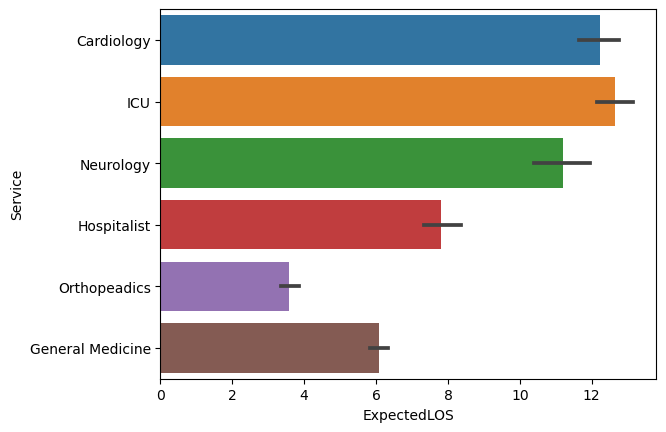

In [ ]:
discharges=hospital_ds.get('Discharges')

sns.barplot(data=discharges, y="Service", x="ExpectedLOS")
plt.show()

# 56 Count of canceled status.

In [ ]:
AV=hospital_ds.get('AmbulatoryVisits') 
AV

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [ ]:
AV1=AV[(AV['VisitStatus']=='Canceled')]
AV1['PatientMRN'].count()

60

# 57 Find the age prone to get stroke.

In [ ]:
df=pd.read_excel("dataset/HospitalDatabase.xlsx",sheet_name=None)

Prone_to_stroke=pd.merge(PatientsW,Re_Ad_Regisrty,on='PatientID')
Prone_to_stroke

In [ ]:
pd.pivot_table(Prone_to_stroke,index=['PatientID'],values='age',aggfunc='max')
Prone_to_stroke1=Prone_to_stroke.loc[:,['PatientID','age','PrimaryDiagnosis']]
Prone_to_stroke1


In [ ]:
Prone_to_stroke2=Prone_to_stroke1.loc[Prone_to_stroke['PrimaryDiagnosis']=='Stroke'].max()
Prone_to_stroke2

# 58 Display total count of patients service wise based on gender.


In [ ]:
Patients_1=df['Patients']
Patients_1

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [ ]:
Patients_2=df['Discharges']
Patients_2

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [ ]:
Patients_3=pd.merge(Patients_1,Patients_2,on='PatientID')
Patients_3

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,389,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,635,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,606,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137
3,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,587,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527
4,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,640,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,738,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English,521,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319
716,739,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English,548,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518
717,740,Tiena,Mahomet,1960-07-23 09:04:25.637,Female,White,English,509,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308
718,741,Rogahn,Group,1960-03-14 20:14:13.941,Female,White,English,605,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870


In [ ]:
Count_of_Patients_based_on_Servicea_Gender=pd.pivot_table(Patients_3,index=['Service','Gender'],values='PatientID',aggfunc='count')
Count_of_Patients_based_on_Servicea_Gender

PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23

# 59 Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [ ]:
Providers=df['Providers']
Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794


In [ ]:
Providers[['first_name','last_name']] = Providers['ProviderName'].loc[Providers['ProviderName'].str.split().str.len() == 2].str.split(expand=True)

In [ ]:
Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,first_name,last_name
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Fred,Man


# 60 Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [3]:
discharges=hospital_ds["Discharges"]
patients=hospital_ds["Patients"]
df=patients

expLOS=pd.merge(patients,discharges,on='PatientID')
expLOS=expLOS[(expLOS['ExpectedLOS']> float(input("Enter a number")))]
expLOS[['FirstName','LastName','ExpectedLOS']]

NameError: name 'hospital_ds' is not defined

# 61 Question: Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

In [ ]:
plt.subplot(1,2,1)
sns.barplot(y='Service',x='ExpectedLOS',data=discharges)

plt.subplot(1,2,2)
sns.barplot(y='PrimaryDiagnosis',x='ExpectedLOS',data=discharges)
plt.show()

# 62 Display the data for all 'White Female' patients above the age of 50.

In [ ]:
PatientsW=hospital_ds['Patients']
PatientsW

In [ ]:
now=pd.Timestamp('now')
PatientsW['DateOfBirth']=PatientsW['DateOfBirth'].where(PatientsW['DateOfBirth']<now,PatientsW['DateOfBirth']-np.timedelta64(100,'Y'))
PatientsW['age']=(now-PatientsW['DateOfBirth']).astype('<m8[Y]')
PatientsW

In [ ]:
Patients1=PatientsW[(PatientsW['Gender']=='Female')&(PatientsW['Race']=='White')&(PatientsW['age']>50)]
Patients1.reset_index(drop=True)

NameError: name 'PatientsW' is not defined

# 63 Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [ ]:
Patients.loc[101:200,['FirstName','LastName']]

# 64 "Using numpy functions, multiply the following arrays


In [ ]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
a

In [ ]:
b

In [ ]:
c=np.dot(a,b)
c

# 65 Get the  number of patients based on service and primary diagnosis.


In [ ]:
Psp=Re_Ad_Regisrty.loc[:,['PatientID','Service','PrimaryDiagnosis']]
Psp


In [ ]:
Psp1=Psp.groupby(['Service','PrimaryDiagnosis']).agg({'PatientID':'count'})

Psp1.rename(columns={'PatientID':'Count of PatientID'})

# 66 np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.


In [ ]:
Array=np.arange(1,31).reshape(6,5)
Array

In [ ]:
Array[(0,0,4,4,5,5),(3,4,3,4,3,4)]

# 67 Make a pivot table by the no. of patients from the admission date till discharge date.

In [ ]:
Re_Ad_Regisrty=df['ReAdmissionRegistry']
Re_Ad_Regisrty

In [ ]:
Re_Ad_Regisrty1=Re_Ad_Regisrty.loc[:,['PatientID','AdmissionDate','DischargeDate']]
Re_Ad_Regisrty1['Discharge_Date']=Re_Ad_Regisrty1.DischargeDate.dt.date

Re_Ad_Regisrty1

In [ ]:
Re_Ad_Regisrty2=pd.pivot_table(Re_Ad_Regisrty1,index=['AdmissionDate','Discharge_Date'],values='PatientID',aggfunc='count')

In [ ]:
Re_Ad_Regisrty2.rename(columns={'PatientID':'Count of PatientID'})

# 68 Display the data where actual LOS is greater than expected LOS.

In [ ]:
Re_Ad_Regisrty=df['ReAdmissionRegistry']
Re_Ad_Regisrty

In [ ]:
Re_Ad_Regisrty['DischargeDateNew']=Re_Ad_Regisrty.DischargeDate.dt.date
Re_Ad_Regisrty['day_diff']=round((Re_Ad_Regisrty['DischargeDate']-Re_Ad_Regisrty['AdmissionDate'])/np.timedelta64(1,'D'),0)
Re_Ad_Regisrty['LOS']=round((Re_Ad_Regisrty['day_diff']-Re_Ad_Regisrty['ExpectedLOS']))
Actual_Expected_Los=Re_Ad_Regisrty.loc[Re_Ad_Regisrty['LOS']>0]
Actual_Expected_Los.reset_index(drop=True)

# 69 Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [ ]:
Patients1.loc[(Patients1['FirstName'].str.contains('lau',case=False)) |(Patients1['LastName'].str.contains('lau',case=False))]

# 70 Plot a graph to show the distribution of expected mortality.

In [ ]:
sns.displot(Re_Ad_Regisrty['ExpectedMortality'],kde=True)

# 71 Create a visualization on the count of patients based on primary diagnosis.

In [ ]:
Primary_Diagnosis=Re_Ad_Regisrty.loc[:,['PrimaryDiagnosis','PatientID']]
Primary_Diagnosis

In [ ]:
Primary_Diagnosis1=Primary_Diagnosis.groupby('PrimaryDiagnosis')['PatientID'].count()
Primary_Diagnosis2=Primary_Diagnosis1.reset_index()
Primary_Diagnosis3=Primary_Diagnosis2.rename(columns={'PatientID':'Count of PatientID'})
Primary_Diagnosis3

In [ ]:
Primary_Diagnosis1.plot(kind='bar',title='Count of PatientID on Primary Diagnosis',xlabel='PrimaryDiagnosis',ylabel='Count of PatientID')
plt.show()

# 72  List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [ ]:
from datetime import datetime, date
  
def age(born):
    born2 = datetime.strptime(born, '%m/%d/%Y').date()
    today = date.today()
    return today.year - born2.year - ((today.month, today.day) < (born2.month, born2.day))
patients['Age']=patients['DateOfBirth'].dt.strftime('%m/%d/%Y').apply(age)

AmbulatoryVisits=ambu_vis
Providers=dataProviders

AmbulatoryVisits.rename(columns = {'PatientMRN':'PatientID'}, inplace = True)
AmbulatoryVisits.head()

patients_ambvis= pd.merge(patients,ambu_vis, on='PatientID', how='inner')
patients_ambvis_provider=pd.merge(patients_ambvis,Providers, on='ProviderID', how='inner')
patients_ambvis_provider.head()

surgery_over_sixty=patients_ambvis_provider[(patients_ambvis_provider['Gender']=='Male') & (patients_ambvis_provider['Age']> 60) &
(patients_ambvis_provider['ProviderSpecialty']=='Surgery')]
surgery_over_sixty

NameError: name 'ambu_vis' is not defined

# 73 Delete the column 'DischargeDispostion' iteratively.

In [ ]:
ITDischargeDispostion=df['Discharges']
ITDischargeDispostion

In [ ]:
for col in ITDischargeDispostion.columns:
    if 'DischargeDisposition' in col:
        del ITDischargeDispostion[col]

In [ ]:
ITDischargeDispostion

# 74 Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)

In [ ]:
##Sql screenshot to be added here
from IPython.display import display
from PIL import Image

display(Image.open("QUES74.png")) 


# 75 Calculate the time spent in ED Department for each visit.

In [ ]:
EDUnique=df['EDUnique']
EDDAD=EDUnique['EDDisposition'].replace('admitted','Admitted',inplace=True)
EDDDIS=EDUnique['EDDisposition'].replace('discharged','Discharged',inplace=True)
EDUnique

In [ ]:
EDUnique['DifferenceIn_Hour']=EDUnique['EDDischargeTime']-EDUnique['VisitDate']
EDUnique['DifferenceIn_Hour']=EDUnique['DifferenceIn_Hour']/np.timedelta64(1,'h')
EDUnique

In [ ]:
EDUnique1=round(EDUnique.pivot_table(index='ReasonForVisit',columns='EDDisposition',values='DifferenceIn_Hour'))
EDUnique1

# 76 Find the last name of the patients, by getting the first name from the user.


In [ ]:
df=pd.read_excel(r"C:\Abinaya\NumpyNinja\phython hackathon\HospitalDatabase .xlsx",sheet_name=None)
FirstName_LastName=df['Patients']
FirstName_LastName['Name']=FirstName_LastName['FirstName'].astype(str)+" "+FirstName_LastName['LastName']
FirstName_LastName

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Abinaya\\NumpyNinja\\phython hackathon\\HospitalDatabase .xlsx'

In [ ]:
#method1
FirstName_LastName.query('FirstName == "Panchito"')

NameError: name 'FirstName_LastName' is not defined

In [ ]:
#method2
FirstName_LastName.query('FirstName == "Wat"')['LastName']

NameError: name 'FirstName_LastName' is not defined

# 77 Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [ ]:
Acuity=df['EDUnique']
EDDAD=Acuity['EDDisposition'].replace('admitted','Admitted',inplace=True)
EDDDIS=Acuity['EDDisposition'].replace('discharged','Discharged',inplace=True)

Acuity

In [ ]:
subsetdf=Acuity[["PatientID",'EDDisposition','Acuity']]
pivot_df = pd.pivot_table(subsetdf,index='Acuity', columns='EDDisposition', values='PatientID',aggfunc='count')
pivot_df
fig, ax = plt.subplots()
ax = pivot_df.sort_values('Discharged', ascending=True).plot.bar(rot=0,ax=ax,figsize=(10,7))
bars = ax.patches
patterns = ['/', '+']
hatches = []
for h in patterns:
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend()
plt.show()


# 78 Find reasonForVisit with highest count of acuity 5 patients.

In [ ]:
Ed_Visits=df['EDVisits']
Ed_Visits

In [ ]:
Ed_vis=Ed_Visits.loc[:,['PatientID','Acuity','ReasonForVisit']]
Ed_vis

In [ ]:
Ed_vis1=Ed_vis.loc[Ed_vis['Acuity']>4]
Ed_vis1=Ed_vis1.reset_index(drop=True)
Ed_vis1

# 79 Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [ ]:

df1=df['ReAdmissionRegistry']
df1

In [ ]:
PD=df1.loc[:,["PrimaryDiagnosis","ExpectedLOS"]]
PD

In [ ]:
PD_Max=PD.groupby('PrimaryDiagnosis').max()
PD_Max


In [ ]:
PD_Min=PD.groupby('PrimaryDiagnosis').min()
PD_Min

In [ ]:
PD_New=pd.merge(PD_Max,PD_Min,on='PrimaryDiagnosis')
PD_New['Difference']=0
PD_New['Difference']=PD_New['ExpectedLOS_x'] - PD_New['ExpectedLOS_y']
PD_New

NameError: name 'PD_Max' is not defined

In [ ]:
PD_New[PD_New['Difference']==PD_New['Difference'].max()]

NameError: name 'PD_New' is not defined

# 80 Write a code snippet to print different ProviderSpecialty

In [ ]:
dataProviders=hospital_ds.get('Providers')
providers_grp=dataProviders.groupby('ProviderSpecialty')['ProviderID'].apply(list)
providers_grp

ProviderSpecialty
Cardiology                      [17, 18, 19, 20, 21, 22, 23, 24]
Pediatrics                           [1, 2, 3, 4, 5, 6, 7, 8, 9]
PrimaryCare    [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...
Surgery                             [10, 11, 12, 13, 14, 15, 16]
Name: ProviderID, dtype: object